# Plotting functions

Visualizing Neuron Tuning curves (Orientational and spatial ones)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from NrnResponse import *
from NSclasses import *


In [2]:
def plot_2D(data_info,title,input_label,output_label,axis_bounds=None,xscale=None,yscale=None):

    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.xticks(fontsize=12, rotation=0)
    plt.yticks(fontsize=12, rotation=0)

    for info_cache in data_info:
        plt.plot(info_cache[0][0],info_cache[0][1],info_cache[1],label=info_cache[2],linewidth=1.5,markersize=3)

    plt.title(title,fontsize=24)
    plt.xlabel(input_label,fontsize=20)
    plt.ylabel(output_label,fontsize=20)
    if not axis_bounds == None:
        plt.axis(axis_bounds)
    if not xscale == None:
        plt.xscale(xscale)
    if not yscale == None:
        plt.yscale(yscale)
    plt.legend(loc='best',fontsize=14)
    plt.show()

In [3]:
def PlotOrientCurve(Mynrn, sti = None):
    assert(0 <= sti <= np.pi)
    [start, end] = 0, np.pi 
    num = Mynrn.grid.tnum
    space = np.linspace(start, end, num, endpoint = True)
    
    Y = Mynrn.OrientCurve()
    
    datainfo = [[[space, Y],'r-','MyNrn']]
    if (sti != None):
        line = np.arange(0,max(Y), 1/(30*max(Y)))
        datainfo = [[[space, Y],'r-','MyNrn'], [[[sti]*len(line),line], 'o', 'Stimulus line']]
    tlt = 'Tuning curve at mu = {0:.2f}'.format(Mynrn.theta)
    plot_2D(datainfo,
            title=tlt,
            input_label='orientation in radian',
            output_label='response')
    
def PlotPosCurve(Mynrn, x = None, y = None):
    [xlim, ylim] = Mynrn.grid.xylim
    X = np.linspace(-1*xlim, xlim, Mynrn.grid.xnum, endpoint = True)
    Y = np.linspace(-1*ylim, ylim, Mynrn.grid.xnum, endpoint = True)
    X, Y = np.meshgrid(X, Y)
    Z = Mynrn.PosCurve()
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, cmap='Reds')
    
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    tlt = 'Tuning curve centered at [{0:.2f}, {1:.2f}]'.format(Mynrn.x, Mynrn.y)
    plt.title(tlt,fontsize=20)
    if ((x != None) and (y != None)):
        assert(-1*xlim <= x <= xlim)
        assert(-1*ylim <= y <= ylim)
        plt.plot(x,y, 'o', label ='Stimulus', markersize=10)
        plt.legend(loc='best')
    plt.xlim = ([-1*xlim, xlim])
    plt.ylim = ([-1*ylim, ylim])
    plt.colorbar()
    plt.show()

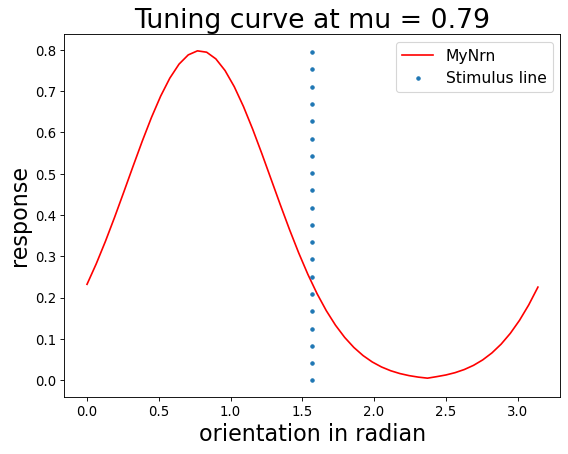

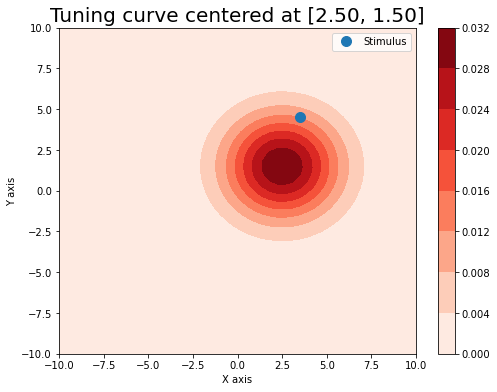

In [4]:
def test():
    Grid = Mygrid(10, 10, 50, 50)
    Myneuron = MyNrn(2.5, 1.5, np.pi/4, Grid)
    Mystimu = MyPtStm(3.5, 4.5, np.pi/2)
    PlotOrientCurve(Myneuron, Mystimu.theta)
    PlotPosCurve(Myneuron, Mystimu.x, Mystimu.y)
    
test()

Normalization model
$$
R = \gamma \frac{I^{n}}{\sigma^{n} + I^{n}_m + I^{n}}
$$

In [35]:
def Initialization(N):
    #N = number of neurons (excluding the target neuron)
    assert(2 <= N <= 150)
    r = 2.5+1*(N-2)/150 #2.5 <= radius <= 5, sigma = 5
    Neurons = [0]*N
    Res = [0]*N
    Grid = Mygrid(10, 10, 50, 50)
    Tar = MyNrn(1, 1, np.pi/2, Grid)
    Stimu = MyPtStm(1.1, 0.9, np.pi/2-0.1) #slight offset from target
    
    for i in range(N):
        #neurons' centers make a circle around the target
        x = r*np.cos(2*i*np.pi/N)+1
        y = r*np.sin(2*i*np.pi/N)+1
        Neurons[i] = MyNrn(x, y, (i+1)*np.pi/N, Grid)
        Res[i] = NrnResponse(Neurons[i], Stimu, Grid)
        
    ini =  NrnResponse(Tar, Stimu, Grid)
    ini_m = sum(Res)
    return ini, ini_m

def NormalizedR(ini, ini_m, gamma = 1, sigma = 0, exp = 1):
    nom = ini**exp
    denom = sigma**exp + ini_m**exp + nom
    return gamma* (nom/denom)

def GammaVar(gamma, N):
    ini, ini_m = initialization(N)
    return NormalizedR(ini, ini_m, gamma, 0, 1)

def SigmaVar(sigma, N):
    ini, ini_m = initialization(N)
    return NormalizedR(ini, ini_m, 1, sigma, 1)

def expVar(exp, N):
    ini, ini_m = initialization(N)
    return NormalizedR(ini, ini_m, 1, 0, exp)


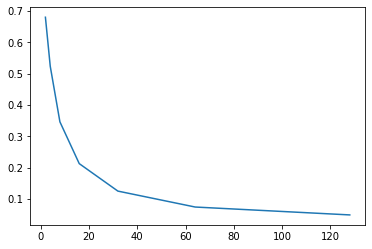

In [36]:
N = [2**i for i in np.arange(7)+1]
R = np.zeros(len(N))
for i in range(len(N)):
    ini, ini_m = Initialization(N[i])
    R[i] = NormalizedR(ini, ini_m, gamma = 1, sigma = 0, exp = 1)
plt.plot(N, R)

In [ ]:
#Uniform Grid set-up
